FIGURE 1
  name                                           geometry
0   AB  POLYGON ((-2.210914257091547 56.88580453335538...
1   AL  POLYGON ((-0.3713768893290278 51.6872990427223...
2    B  POLYGON ((-2.054359660178655 52.24755747627114...
3   BA  POLYGON ((-2.084295514297709 51.31717052350098...
4   BB  POLYGON ((-2.215571252608544 53.73160415979756...
FIGURE 2
   name                                           geometry
0  AB10  POLYGON ((-2.116454759005259 57.14656265903432...
1  AB11  (POLYGON ((-2.052573095588467 57.1342600856536...
2  AB12  (POLYGON ((-2.128066321470298 57.0368357386797...
3  AB13  POLYGON ((-2.261525922489881 57.10693578217748...
4  AB14  POLYGON ((-2.261525922489878 57.10693578217748...


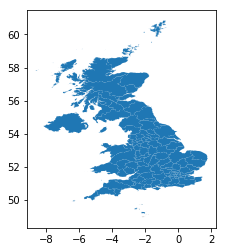

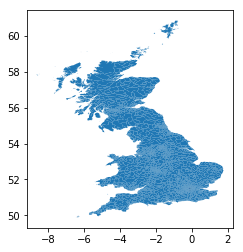

In [10]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

print("FIGURE 1")
plt.figure(0)
fp = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Areas.shp")
map_df = gpd.read_file(fp)
print(map_df.head())
map_df.plot()
print("FIGURE 2")
plt.figure(1)
fp2 = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
map_df2 = gpd.read_file(fp2)
print(map_df2.head())
map_df2.plot()
plt.show()

In [ ]:
for x in map_df2.name.unique():
    print(x)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))

In [ ]:
map_df2.plot(ax=ax)
ax.axis('off')
plt.show()

In [11]:
postcodes = map_df.name.unique()

print(postcodes)

['AB' 'AL' 'B' 'BA' 'BB' 'BD' 'BH' 'BL' 'BN' 'BR' 'BS' 'CA' 'CB' 'CF' 'CH'
 'CM' 'CO' 'CR' 'CT' 'CV' 'CW' 'DA' 'DD' 'DE' 'DG' 'DH' 'DL' 'DN' 'DT' 'DY'
 'E' 'EC' 'EH' 'EN' 'EX' 'FK' 'FY' 'G' 'GL' 'GU' 'HA' 'HD' 'HG' 'HP' 'HR'
 'HS' 'HU' 'HX' 'IG' 'IP' 'IV' 'KA' 'KT' 'KW' 'KY' 'L' 'LA' 'LD' 'LE' 'LL'
 'LN' 'LS' 'LU' 'M' 'ME' 'MK' 'ML' 'N' 'NE' 'NG' 'NN' 'NP' 'NR' 'NW' 'OL'
 'OX' 'PA' 'PE' 'PH' 'PL' 'PO' 'PR' 'RG' 'RH' 'RM' 'S' 'SA' 'SE' 'SG' 'SK'
 'SL' 'SM' 'SN' 'SO' 'SP' 'SR' 'SS' 'ST' 'SW' 'SY' 'TA' 'TD' 'TF' 'TN' 'TQ'
 'TR' 'TS' 'TW' 'UB' 'W' 'WA' 'WC' 'WD' 'WF' 'WN' 'WR' 'WS' 'WV' 'YO' 'ZE'
 'BT' 'GY' 'IM' 'JE']


In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
df1 = map_df
df1["val"] = [ random.randint(1,1000) for k in df1.index ]

In [ ]:
plt.figure(2)
df1.plot(column='val', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()

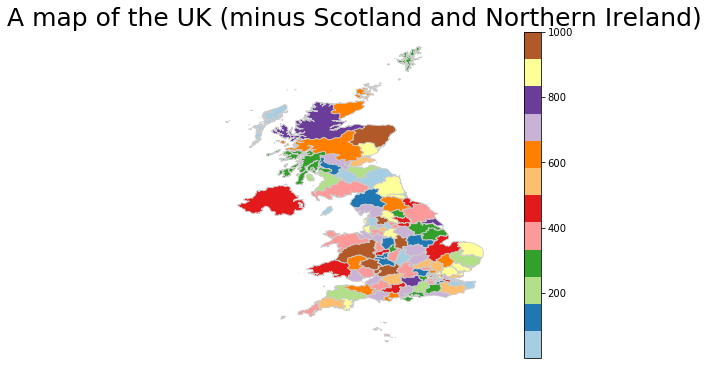

  name                                           geometry  val
0   AB  POLYGON ((-2.210914257091547 56.88580453335538...  979
1   AL  POLYGON ((-0.3713768893290278 51.6872990427223...  645
2    B  POLYGON ((-2.054359660178655 52.24755747627114...  357
3   BA  POLYGON ((-2.084295514297709 51.31717052350098...  391
4   BB  POLYGON ((-2.215571252608544 53.73160415979756...  907
FINISHED


In [4]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Areas.shp")
output_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/output.csv")

colormap = 'Paired'

plt.figure(0)
map_df = gpd.read_file(shape_path)
map_df["val"] = [ random.randint(1,1000) for k in map_df.index ]
fig, ax = plt.subplots(1, figsize=(10, 6))
mdfplt = map_df.plot(column='val', cmap=colormap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("A map of the UK (minus Scotland and Northern Ireland)", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=1, vmax=1000))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()

print(map_df.head())
map_df.to_csv(output_path)

print("FINISHED")

In [ ]:
df21 = pd.read_csv(output_path)
df21.name.unique()

In [ ]:
datafile = os.path.expanduser("~\Documents\ScotDIST\Hackathon 26032019\pp-complete.csv/pp-complete.csv")
print(os.path.isfile(datafile))
file = pd.read_csv(datafile, header=None, iterator=True,
                   chunksize=1000, usecols=[1,2,3,4,5,6], parse_dates=True,
                   names=('Price', 'Date', 'PC', 'Type', 'New?', 'Freehold')
                  )

#pieces = [x.groupby('PC')['Price'].agg(['sum','count']) for x in file]
#agg2 = pd.concat(pieces).groupby(level=0).sum()
#print(agg2['sum']/agg2['count'])

In [63]:
import re
def areaCode(postcode):
    #print(postcode)
    try:
        return re.findall('([A-Z]+)', postcode)[0]
    except:
        print(type(postcode))
        print("ERROR: {}".format(postcode))

print(areaCode("AW21 3LF"))

def removeCommas(num):
    try:
        return int("".join(re.findall("(\d)",num)))
    except Exception as e:
        print(e)
        print(num)
        return
    
print(removeCommas('45,256'))

AW
45256


invalid literal for int() with base 10: ''
45,256
None


In [ ]:
c = file.get_chunk()
c.head()
c = c[c.PC.notnull()]
c["PC"] = c["PC"].apply(areaCode)
c.head()


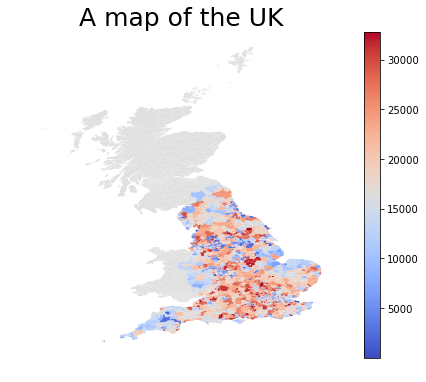

In [79]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
input_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/imd.csv")

colormap = plt.cm.coolwarm
colormap.set_under(color='#e0e0e0')

#plt.figure(0)
map_df = gpd.read_file(shape_path)

df = pd.read_csv(input_path)
#print("BEFORE MERGE")
#print("MAX {}".format(df['index'].max()))
#print(df.loc[df['index'].idxmax()])
#print("HEAD")
#print(df.head())

df['index'] = df['index'].apply(removeCommas)

merged = map_df.set_index('name').join(df.set_index('PC_O'))
merged['index'].fillna(-1, inplace=True)

#print("AFTER MERGE")
#print("MAX")
maxval = merged['index'].max()
#print(merged['index'].min())
#merged = merged[merged['index'].notnull()]
#merged = merged[merged['index'].isnull()]
#print(merged.head())

#plt.figure(0)

fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='index', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0',vmin=1)

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("A map of the UK", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=1, vmax=maxval))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()
